In [2]:
import numpy
import numpy as np
from numpy import linalg as LA

**1.1 Dataset**

In [3]:
# Start by creating a design matrix for regression with m = 150 examples, each of dimension d = 75.
# We will choose a true weight vector theta that has only a few non-zero components:

# 1. Construct a random design matrix X 
X = numpy.random.rand(150,75)

# 2. Construct a true weight vector theta. Set the first 10 component of theta to 10 or -10 arbitrarily and all the other components to zero.
t = [-1,1]
theta_1 = numpy.random.choice(t,10)*10
theta_2 = numpy.zeros(65)
theta = numpy.concatenate((theta_1,theta_2), axis=0)

# 3. Construct a vector y = X theta + epsilon, where epsilon is a random noise vector
epsilon = 0.1*numpy.random.randn(150)
y = numpy.dot(X,theta)+epsilon

# 4. Split the dataset by taking the first 80 points for training, the next 20 points for validation,
# and the last 50 points for testing
X_training = X[0:80,:]
y_training = y[0:80]
X_validation = X[80:100,:]
y_validation = y[80:100]
X_testing = X[100:150,:]
y_testing = y[100:150]

# 5. Save six files to local
numpy.savetxt('X_train.txt', X_training) 
numpy.savetxt('y_train.txt', y_training) 
numpy.savetxt('X_valid.txt', X_validation)
numpy.savetxt('y_valid.txt', y_validation) 
numpy.savetxt('X_test.txt', X_testing) 
numpy.savetxt('y_test.txt', y_testing) 

In [4]:
X.shape

(150, 75)

**2.Ridge Regression**

In [5]:
import numpy
from scipy.optimize import minimize

X_train = numpy.loadtxt("X_train.txt")
y_train = numpy.loadtxt("y_train.txt")
X_validation = numpy.loadtxt("X_valid.txt")
y_validation = numpy.loadtxt("y_valid.txt")
X_test = numpy.loadtxt("X_test.txt")
y_test = numpy.loadtxt("y_test.txt")
(N,D) = X.shape

w = numpy.random.rand(D,1)
def ridge(X, y, Lambda):
  def ridge_obj(theta):
    return ((numpy.linalg.norm(numpy.dot(X,theta) - y))**2)/(2*N) + Lambda*(numpy.linalg.norm(theta))**2
  return ridge_obj

def compute_loss(X, y, theta):
  return ((numpy.linalg.norm(numpy.dot(X,theta) - y))**2)/(2*N)

def find_best_lambda(X_train, y_train, X_validation, y_validation, tol=10**-3 ):
    result = []
    lambda_list = []
    theta_list=[]
    zero_count_list=[]
    
    #generate list of lambda, loss_result, zero_count(tol <)
    for i in range(-10,4):
      Lambda = 10**i;
      w_opt = minimize(ridge(X_train, y_train, Lambda), w)
      
      theta_list.append(w_opt.x)
      #zero_count of w_opt(theta_imitate)
      
      w_opt_greater_than_tol_tuple = np.where( abs(np.asarray(w_opt.x[0:10]))<=tol )+np.where(abs(np.asarray(w_opt.x[10:-1]>tol)))
      zero_count = int(len(w_opt_greater_than_tol_tuple[0]))
      zero_count_list.append(zero_count)
      result.append(compute_loss(X_validation, y_validation, w_opt.x))
      lambda_list.append(Lambda)
    
    #select best lambda based on loss_result
    result_array = np.asarray(result)
    lambda_array = np.asarray(lambda_list)
    min_result_index = result_array.argmin()
    best_lambda = lambda_list[min_result_index]
    theta_opt = theta_list[min_result_index]
    return lambda_array, result_array, best_lambda, theta_opt, zero_count_list




In [6]:
find_best_lambda(X_train, y_train, X_validation, y_validation)

(array([  1.00000000e-10,   1.00000000e-09,   1.00000000e-08,
          1.00000000e-07,   1.00000000e-06,   1.00000000e-05,
          1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
          1.00000000e+02,   1.00000000e+03]),
 array([ 0.01524294,  0.01524231,  0.01523582,  0.01517088,  0.01454499,
         0.00984431,  0.02443234,  0.58055087,  2.30043767,  4.41674934,
         5.54638556,  5.69487784,  5.69201674,  5.6906083 ]),
 1e-05,
 array([ -1.02824153e+01,   1.00559198e+01,  -9.96020813e+00,
         -9.84223087e+00,  -1.00571785e+01,   1.02198790e+01,
          9.74386627e+00,  -1.01603815e+01,   1.00199921e+01,
          9.91565810e+00,  -1.51838883e-01,  -1.19782100e-01,
          1.24476957e-02,   2.17725990e-02,   4.53201208e-03,
         -1.98144746e-01,  -7.83505489e-02,  -1.78594688e-01,
         -1.32015625e-01,   1.16473398e-01,  -1.80202746e-01,
          4.10830574e-02,  -2.15384806e-01,  -2.15852494

**3.Coordinate Descent for Lasso(a.k.a The Shooting algorithm)**

In [8]:
####################### Lasso opt slow###############################

import numpy
import numpy as np
from __future__ import division
import os
import numpy as np
os.chdir("D:/Spring_2017/data/")

#load data
X_train = numpy.loadtxt("X_train.txt")
y_train = numpy.loadtxt("y_train.txt")
X_validation = numpy.loadtxt("X_valid.txt")
y_validation = numpy.loadtxt("y_valid.txt")
X_test = numpy.loadtxt("X_test.txt")
y_test = numpy.loadtxt("y_test.txt")

#initialize 
#lambda_max = 2 * (infinity_norm||X.T*y||)
lambda_max = 2*abs(np.amax(np.asarray(np.dot(X_train.T, y_train))))
lambda_max_int = int(lambda_max)
theta_opt = find_best_lambda(X_train, y_train, X_validation, y_validation)[3]
def compute_loss(X, y, theta):
        return ((numpy.linalg.norm(numpy.dot(X,theta) - y))**2)/(2*(X.shape[0]))

def compute_obj_loss(theta, X, y , lambda_reg):
    loss = compute_loss(theta, X,y)
    loss += lambda_reg * np.linalg.norm(theta, ord=1)
    return loss  

def Lasso_opt_slow (X_train, y_train, X_validation, y_validation, theta_opt, max_iter=10000000, tol=10**-8):
    result=[]
    lambda_reg_list = []
    w_list =[]
    for k in range(-10,4):
        lambda_reg = 10**k
        w = np.zeros(X_train.shape[1])
        num_iter = 0
        diff=1
        loss_current=0
        loss_previous=0
        while(num_iter < max_iter and diff>tol):
            loss_previous = compute_loss(X_validation, y_validation, theta_opt)
            for j in range (X_train.shape[1]):
                a = 0
                c = 0
                for i in range(X_train.shape[0]):
                    a = a + 2*X[i,j]*X[i,j]
                    c = c + 2*(X[i,j] * (y[i] - X[i].dot(w) + w[j] * X[i,j]))
                w[j] = (np.sign(c/a)) * max(0, abs(c/a) - lambda_reg/a) 
            loss_current = compute_loss(X_validation, y_validation, w) 
            diff = loss_current - loss_previous
            print(diff)
            num_iter += num_iter+1
        w_list.append(w)
        #select min loss for specific lambda
        result.append(loss_current)
        lambda_reg_list.append(lambda_reg)
        
        
        
    result_array = np.asarray(result)
    min_result_index = result_array.argmin()
    result = result_array[min_result_index]
    
    lambda_array = np.asarray(lambda_reg_list)
    best_lambda = lambda_reg_list[min_result_index]
    
    w_opt = w_list[min_result_index]
    return best_lambda, min(result_array), lambda_array, result_array, w_list, w_opt

            
  


In [9]:
Lasso_opt_slow (X_train, y_train, X_validation, y_validation, theta_opt, max_iter=1000, tol=10**-8)

759.079889658
747.704475274
740.095855982
734.812156033
731.09636539
728.471244974
726.628159301
725.357736919
724.507096284
723.957686517
759.079889658
747.704475274
740.095855982
734.812156034
731.096365392
728.471244976
726.628159303
725.357736921
724.507096286
723.957686519
759.079889656
747.704475274
740.095855987
734.812156043
731.096365405
728.471244994
726.628159323
725.357736943
724.507096308
723.95768654
759.079889636
747.70447528
740.095856039
734.812156134
731.096365544
728.471245176
726.628159525
725.357737164
724.507096532
723.957686746
759.079889436
747.704475333
740.095856554
734.812157045
731.096366926
728.471246997
726.628161537
725.35773937
724.507098766
723.95768881
759.079887429
747.704475865
740.0958617
734.812166155
731.096380744
728.471265206
726.628181658
725.357761427
724.507121114
723.95770945
759.079867369
747.704481188
740.09591317
734.812257257
731.096518932
728.471447292
726.628382869
725.357982002
724.507344593
723.95791585
759.079666761
747.70453442
740

(1e-10,
 724.01714299785795,
 array([  1.00000000e-10,   1.00000000e-09,   1.00000000e-08,
          1.00000000e-07,   1.00000000e-06,   1.00000000e-05,
          1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
          1.00000000e+02,   1.00000000e+03]),
 array([ 724.017143  ,  724.017143  ,  724.01714302,  724.01714323,
         724.01714529,  724.01716593,  724.01737233,  724.01943638,
         724.04353433,  724.28224361,  726.19649099,  731.65143985,
         783.99599905,  745.89591183]),
 [array([ -7.72785087e+00,   9.35516032e+00,  -8.62557195e+00,
          -6.86993898e+00,  -3.57439916e+00,   1.33054924e+01,
           8.51635809e+00,  -8.96029721e+00,   8.21058373e+00,
           6.81071063e+00,  -3.87216341e+00,  -1.54667949e+00,
          -3.76085335e+00,  -4.45473808e+00,  -1.23233450e+00,
          -5.98345697e-01,  -5.22715300e-01,   3.19753241e+00,
          -1.16362296e+00,   2.30535181e+00,  -2.495923

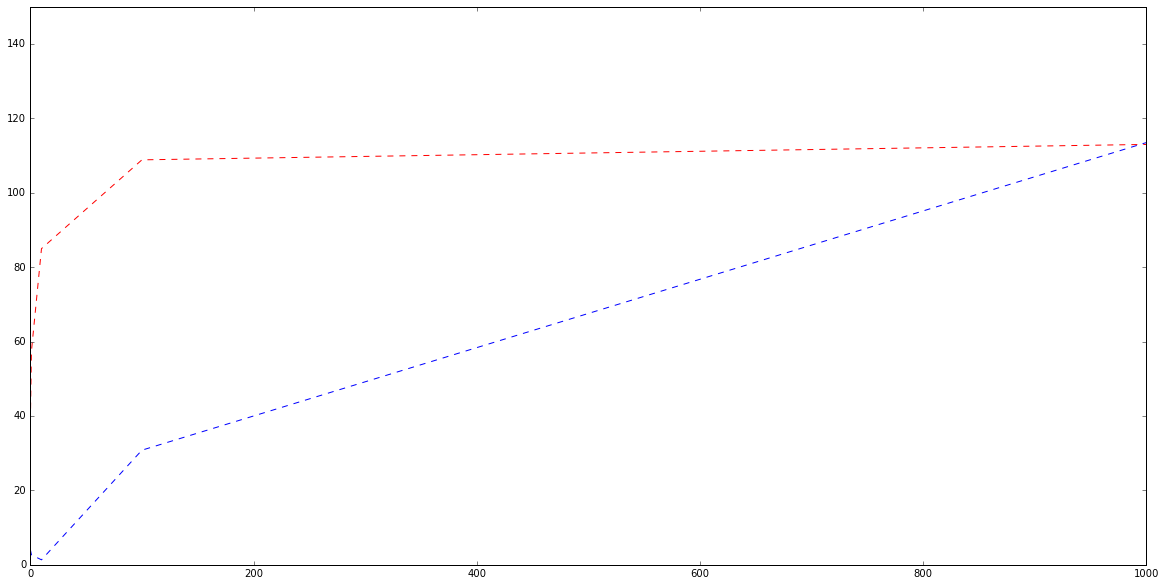

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

ridge_lambda = find_best_lambda(X_train, y_train, X_validation, y_validation)[0]
ridge_loss = find_best_lambda(X_train, y_train, X_validation, y_validation)[1]
lasso_lambda =  Lasso_opt_slow (X_train, y_train, X_validation, y_validation, theta_opt,max_iter=10000000, tol=10**-1)[2]
lasso_loss =  Lasso_opt_slow (X_train, y_train, X_validation, y_validation, theta_opt,max_iter=10000000, tol=10**-1)[3]

plt.figure(figsize=(20,10))
plt.xlim([0,1000])
plt.ylim([0,150])
plt.plot(ridge_lambda, ridge_loss, 'r--', lasso_lambda, lasso_loss, 'b--')

In [123]:
def count_zero_lasso_opt_w(tol=10**-3):
    w_list = Lasso_opt_fast (X_train, y_train, X_validation, y_validation, theta_opt,max_iter=10000000, tol=10**-1)[-1]
    lambda_list=[]
    zero_count_list=[]
    for k in range(-10,3):
        lambda_reg = 10**k
        lambda_list.append(lambda_reg)
    for i in range(len(w_list)):
        w_greater_than_tol_tuple = np.where( abs(np.asarray(w_list[i][0:10])<=tol)) +np.where(abs(np.asarray(w_list[i][10:-1]>tol)))
        zero_count = int(len(w_greater_than_tol_tuple))
        zero_count_list.append(zero_count)
    return lambda_list, zero_count_list

count_zero_lasso_opt_w(tol=10**-3)

([1e-10,
  1e-09,
  1e-08,
  1e-07,
  1e-06,
  1e-05,
  0.0001,
  0.001,
  0.01,
  0.1,
  1,
  10,
  100],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [136]:
#################homotopy path##############
def homotopy(X_train,y_train, X_validation, y_validation, ceiling, type = "fast"):
    w = np.zeros(X_train.shape[1])
    loss_homotopy_list = []
    w_homotopy_list=[]
    lambda_reg = ceiling
    while lambda_reg >10**-10:
        if type =="slow":
            best_lambda, min_result_array, lambda_array, result_array, w_list, w_opt = Lasso_opt_slow(X_train, y_train, X_validation, y_validation, theta_opt, max_iter=10000000, tol=10**-8)
        if type =="fast":
            best_lambda, min_result_array, lambda_array, result_array, w_list, w_opt = Lasso_opt_fast(X_train, y_train, X_validation, y_validation, theta_opt, max_iter=10000000, tol=10**-8)

        lambda_reg = lambda_reg*0.1
    return w_list, result_array


In [137]:
#################compare time#############
from time import clock
lambda_range = [10**x for x in range(-10,4)]

loss_shoot_slow = []
start = clock()
for Lambda in lambda_range:
    w = Lasso_opt_slow (X_train, y_train, X_validation, y_validation, theta_opt, max_iter=10000000, tol=10**-8)[-1]
    loss = compute_loss(X_validation, y_validation, w)
    loss_shoot_slow.append(loss)
end=clock()
time_shooting = end-start
print('Slow Shooting algorithm: %f seconds' %time_shooting)

loss_shoot_fast = []
start = clock()
for Lambda in lambda_range:
    w = Lasso_opt_fast (X_train, y_train, X_validation, y_validation, theta_opt, max_iter=10000000, tol=10**-8)[-1]
    loss = compute_loss(X_validation, y_validation, w)
    loss_shoot_fast.append(loss)
end=clock()
time_shooting=end-start
print('Fast Shooting algorithm: %f seconds'%time_shooting)

w = np.zeros(X_train.shape[1])
start = clock()
w_homotopy_slow, loss_homotopy_slow = homotopy(X_train,y_train, X_validation, y_validation, ceiling=10**3, type = "slow")
end = clock()
time_homotopy = end - start
print("Slow Homotopy algorithm:%f seconds" %time_homotopy)

w = np.zeros(X_train.shape[1])
start = clock()
w_homotopy_fast, loss_homotopy_fast = homotopy(X_train, y_train, X_validation, y_validation, ceiling=10**3, type = "fast")
end = clock()
time_homotopy = end - start
print("Fast Homotopy algorithm:%f seconds" %time_homotopy)

Slow Shooting algorithm: 86.098090 seconds
Fast Shooting algorithm: 8.670992 seconds
Slow Homotopy algorithm:84.905199 seconds
Fast Homotopy algorithm:8.281507 seconds


In [126]:
####################### Lasso opt fast###############################
import numpy
import numpy as np
from __future__ import division
#load data
X_train = numpy.loadtxt("X_train.txt")
y_train = numpy.loadtxt("y_train.txt")
X_validation = numpy.loadtxt("X_valid.txt")
y_validation = numpy.loadtxt("y_valid.txt")
X_test = numpy.loadtxt("X_test.txt")
y_test = numpy.loadtxt("y_test.txt")

#initialize 
#lambda_max = 2 * (infinity_norm||X.T*y||)
lambda_max = 2*abs(np.amax(np.asarray(np.dot(X_train.T, y_train))))
lambda_max_int = int(lambda_max)
theta_opt = find_best_lambda(X_train, y_train, X_validation, y_validation)[3]
def compute_loss(X, y, theta):
    return ((numpy.linalg.norm(numpy.dot(X,theta) - y))**2)/(2*(X.shape[0]))

def compute_obj_loss(theta, X, y , lambda_reg):
    loss = compute_loss(theta, X,y)
    loss += lambda_reg * np.linalg.norm(theta, ord=1)
    return loss  

def Lasso_opt_fast (X_train, y_train, X_validation, y_validation, theta_opt, max_iter=10000000, tol=10**-8):
    result=[]
    lambda_reg_list = []
    w_list =[]
    for k in range(-10,4):
        lambda_reg = 10**k
        w = np.zeros(X_train.shape[1])
        num_iter = 0
        diff=1
        loss_current=0
        loss_previous=0
        while(num_iter < max_iter and diff>tol):
            loss_previous = compute_loss(X_validation, y_validation, theta_opt)
            for j in range (X_train.shape[1]):
                a = 2*(X_train[:,j].dot(X_train[:,j]) )
                c = X_train[:,j].dot(y_train - X_train.dot(w) + w[j]*X_train[:,j]) 
                c=2*c
                w[j] = (np.sign(c/a)) * max(0, abs(c/a) - lambda_reg/a) 
            loss_current = compute_loss(X_validation, y_validation, w) 
            diff = loss_current - loss_previous
            num_iter += num_iter+1
        w_list.append(w)
        #select min loss for specific lambda
        result.append(loss_current)
        lambda_reg_list.append(lambda_reg)
        
        
        
    result_array = np.asarray(result)
    min_result_index = result_array.argmin()
    result = result_array[min_result_index]
    
    lambda_array = np.asarray(lambda_reg_list)
    best_lambda = lambda_reg_list[min_result_index]
    
    w_opt = w_list[min_result_index]
    return best_lambda, min(result_array), lambda_array, result_array, w_list, w_opt

Lasso_opt_fast (X_train, y_train, X_validation, y_validation, theta_opt,max_iter=10000000, tol=10**-8)

(10,
 1.3378838369387718,
 array([  1.00000000e-10,   1.00000000e-09,   1.00000000e-08,
          1.00000000e-07,   1.00000000e-06,   1.00000000e-05,
          1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
          1.00000000e+02,   1.00000000e+03]),
 array([   4.14973521,    4.14973521,    4.14973519,    4.14973504,
           4.14973355,    4.14971861,    4.14956921,    4.14807666,
           4.13317184,    3.98624335,    2.67536114,    1.33788384,
          30.81402012,  113.50030718]),
 [array([ 12.2354794 ,  10.53393607,  -7.04542737,   9.87038793,
           9.40498351,   7.89456737, -11.66090573,   5.40184599,
          -9.61532083, -10.61317964,   2.25932074,   1.2399948 ,
           1.52028658,   1.10149113,   1.09309878,   0.5893625 ,
          -0.56681265,   0.19716119,   1.60444161,  -0.81065939,
           0.30797877,   1.28286908,  -0.73320522,  -0.77100379,
           0.25520441,   3.4557177 ,  -2.42732

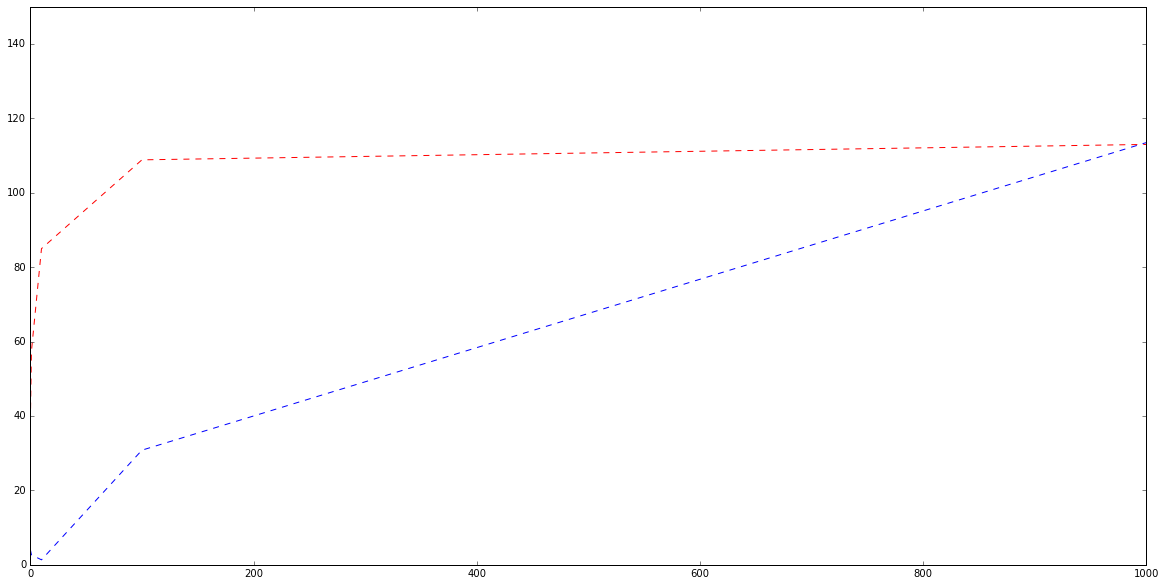

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

ridge_lambda = find_best_lambda(X_train, y_train, X_validation, y_validation)[0]
ridge_loss = find_best_lambda(X_train, y_train, X_validation, y_validation)[1]
lasso_lambda =  Lasso_opt_fast (X_train, y_train, X_validation, y_validation, theta_opt,max_iter=10000000, tol=10**-1)[2]
lasso_loss =  Lasso_opt_fast (X_train, y_train, X_validation, y_validation, theta_opt,max_iter=10000000, tol=10**-1)[3]

plt.figure(figsize=(20,10))
plt.xlim([0,1000])
plt.ylim([0,150])
plt.plot(ridge_lambda, ridge_loss, 'r--', lasso_lambda, lasso_loss, 'b--')


3.3.2

In [114]:
def count_zero_lasso_opt_w(tol=10**-3):
    w_list = Lasso_opt (X_train, y_train, X_validation, y_validation, theta_opt,max_iter=10000000, tol=10**-1)[-1]
    lambda_list=[]
    zero_count_list=[]
    for k in range(-10,3):
        lambda_reg = 10**k
        lambda_list.append(lambda_reg)
    for i in range(len(w_list)):
        w_greater_than_tol_tuple = np.where( abs(np.asarray(w_list[i][0:10])<=tol)) +np.where(abs(np.asarray(w_list[i][10:-1]>tol)))
        zero_count = int(len(w_greater_than_tol_tuple))
        zero_count_list.append(zero_count)
    return lambda_list, zero_count_list

count_zero_lasso_opt_w(tol=10**-3)

([1e-10,
  1e-09,
  1e-08,
  1e-07,
  1e-06,
  1e-05,
  0.0001,
  0.001,
  0.01,
  0.1,
  1,
  10,
  100],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

3.3.3